# Lecture 11: Dynamic models and rates of change

## Static versus dynamic problems

-   So far we have considered computational models of problems that are assumed to be static, for example:

    -   calculating the [distribution of temperature inside an object](./lec05.md) for a given, fixed, temperature distribution around the boundary;

    -   finding the [flow of traffic in a network](./lec05.md) given a fixed set of observations;

    -   the sparse matrix representation of the WWW, at a given instant in time, that is used by [Google's PageRank algorithm](https://en.wikipedia.org/wiki/PageRank#Algorithm).

-   Linear systems of equations model problems for which there are constant parameters and a fixed answer.

-   Many other problems that require computational models are dynamic - they change with time - for example:

    -   tracking the position and speed of an object in a video game;

    -   predicting the evolution of a weather system over the next 48 hours;

    -   modelling a population (bacteria, animals, people, etc.) as it evolves in time;

    -   atmospheric chemistry models for the dispersion of emissions, pollutants, ozone, etc.

## Rates of change

### Example: Tracking an object

-   Suppose we know that an object is moving at 2 meters per second (m/s) - what does that mean?

    -   Easy: in one second it will travel 2 meters!

-   So, how far will it travel in:

    -   $0.1$ seconds?
    -   $0.01$ seconds?
    -   $0.001$ seconds?
    -   $10^{-6}$ seconds?

-   What does this tell us about speed?

    -   $\text{Distance travelled} = \text{speed} \times \text{time}$
    -   That is, $\text{speed} = \dfrac{\text{distance travelled}}{\text{time}}$
    -   Equivalently, $\text{speed} = \dfrac{(\text{distance at end}) - (\text{distance at start})}{\text{time}}$.

-   Another way of saying this is that the speed is the **rate of change** of distance:

    -   2 meters per second;
    -   0.002 meters per millisecond;
    -   0.000002 meters per microsecond;
    -   etc.

## The derivative as a rate of change

-   Now suppose the object's speed is not constant.

-   For example, the speed $S(t)$ could be given at each time $t$ by

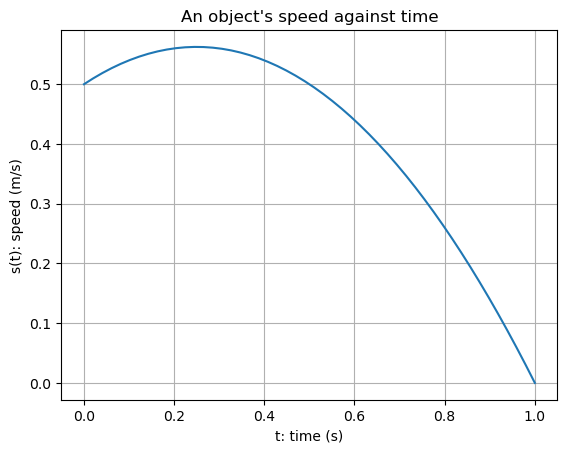

In [1]:
from matplotlib import pyplot as plt
import numpy as np

t = np.linspace(0, 1)
s = -(t - 1.0) * (t + 0.5)
plt.plot(t, s)

plt.title("An object's speed against time")
plt.xlabel("t: time (s)")
plt.ylabel("s(t): speed (m/s)")
plt.grid()
plt.show()

-   How far would the object travel in one second now?

### Tracking at a non-constant speed

This is a much harder problem.

**How can we approximate the solution?**

1.  We could consider each tenth of a second separately and estimate the distance covered at each tenth (assuming the $s$ is approximately constant in each interval):

    ``` python
    D, t = 0.0, 0.0
    for i in range(10):
        D = D + 0.1 * S(t)
        t = t + 0.1
    ```

2.  We could consider each hundredth of a second separately and estimate the distance covered at each hundredth:

    ``` python
    D, t = 0.0, 0.0
    for i in range(100):
        D = D + 0.01 * S(t)
        t = t + 0.01
    ```

3.  We could consider each thousandth of a second separately and estimate the distance covered at each thousandth:

    ``` python
    D, t = 0.0, 0.0
    for i in range(1000):
        D = D + 0.001 * S(t)
        t = t + 0.001
    ```

We expect each of these approximations to get more and more accurate...

#### Example

Consider $S(t)$ given by:

In [2]:
def S(t):
    """
    Return a value for the speed, S, as a function of time, t.
    ARGUMENTS:  t   the time
    RETURNS:    S   the speed
    """
    return 1 + 5 * t - 6 * t**2

-   The following table of results is obtained:

In [3]:
import pandas as pd

headers = ["# intervals", "increment size dt", "total distance"]
data = []

for j in range(1, 6):
    n = 10**j
    dt = 1.0 / n

    D, t = 0.0, 0.0
    for i in range(n):
        D = D + dt * S(t)
        t = t + dt

    data.append([n, dt, D])

df = pd.DataFrame(data, columns=headers)
df.style.hide_index().set_caption("Total distance as a function of number of steps")

AttributeError: 'Styler' object has no attribute 'hide_index'

-   We appear to be converging to an answer in the limit as $\mathrm{d}t \to 0$...

### Why does this work?

-   The approach above uses the fact that, at any *instant* in time, the speed is the rate of change in distance:

    -   That is, $\text{speed} = \dfrac{\text{change in distance}}{\text{time}}$;

    -   so, $\text{change in distance} = \text{time} \times \text{speed}$;

    -   in code this can be expressed as:

	    ``` python
        d = d + dt * s(t)
        ```

-   We can re-arrange the last expression to get the average speed over the interval for $t$ to $t + \mathrm{d}t$:

    $$
    S(t) = \frac{D(t+\mathrm{d}t) - D(t)}{\mathrm{d}t}.
    $$


-   In fact, to obtain a converged answer it is necessary to take smaller and smaller choices for $\mathrm{d}t$.

-   In mathematical notation this is written as

    $$
    S(t) = \lim_{\mathrm{d}t \to 0} \frac{D(t+\mathrm{d}t) - D(t)}{\mathrm{d}t}.
    $$

-   This is what **rate of change** really means at each instant.

-   The standard terminology for this is to say that the speed $S(t)$ is the **derivative** of the distance $d$ with respect to time $t$.

-   The notation for this is $S(t) = D'(t)$.

### A graphical interpretation

-   We can give a graphical interpretation of the relationship between $D(t)$ and its derivative $D'(t)$.

In [ ]:
from matplotlib import pyplot as plt
import numpy as np


def D(t):
    return -(t**3) / 3 + t**2 / 4 + t / 2


def S(t):
    return -(t - 1.0) * (t + 0.5)


t = np.linspace(0, 1)
plt.plot(t, S(t), label="Speed")
plt.plot(t, D(t), label="Distance")

plt.title("Distance and speed as functions of time")
plt.xlabel("t: time (s)")
plt.legend()
plt.grid()
plt.show()

Inspection of the plots shows that the **steepness** of the red curve $D(t)$ is related to the **value** of the blue curve $S(t)$:

-   As the blue curve increases in value, the red curve increases in steepness.

-   When the blue curve starts to decrease in value, the red curve decreases in steepness.

-   By the time the blue curve has a value of zero the red curve is flat.

In fact the **gradient** of the red curve is precisely equal to the **value** of the blue curve.

This provides for an alternative interpretation of the derivative of a function...

> The function $D'(t)$ is the function whose value is equal to the slope (or gradient) of $D(t)$ at every value of $t$.

## The derivative as a gradient

-   What is the slope/gradient of a line?

-   It is the steepness...

In [ ]:
from matplotlib import pyplot as plt
import numpy as np


def plot_slope(a, b):
    plt.plot([0, a, a, 0], [0, 0, b, 0], "k")

    plt.text(a / 2, -0.4, f"{a}", fontsize="xx-large")
    plt.text(a + 0.1, b / 2, f"{b}", fontsize="xx-large")

    plt.axis("square")
    plt.axis("off")


plt.subplot(131)
plot_slope(2, 1)

plt.subplot(132)
plot_slope(2, 2)

plt.subplot(133)
plot_slope(1, 2)

plt.show()

-   The equation of a straight line with slope $m$ is given by

    $$
    y(t) = m t + c.
    $$

### Slope of a curve

-   What is the slope/gradient of a curve?

-   The slope of the straight-line approximation ("chord") is

    $$
    \frac{y(t + \mathrm{d}t) - y(t)}{\mathrm{d}t}.
    $$

In [ ]:
from matplotlib import pyplot as plt
import numpy as np


def f(x):
    return np.exp(-(x**2))


def plot(dt=1.0):
    t = np.linspace(-2, 2, 200)
    plt.plot(t, f(t))

    plt.plot([0, 0, -2], [0, f(0), f(0)], "--")
    plt.plot([dt, dt, -2], [0, f(dt), f(dt)], "--")

    slope = (f(dt) - f(0)) / dt
    plt.plot([0, dt], [f(0), f(dt)], label=f"{slope=:.1f}")

    plt.xticks([0, dt], ["t", "t + dt"])
    plt.yticks([f(0), f(dt)], ["f(t)", "f(t + dt)"])

    plt.legend()
    plt.show()


plot(1.0)

-   We can get a better approximation by taking a smaller value for $\mathrm{d}t$...

In [ ]:
from matplotlib import pyplot as plt
import numpy as np


def f(x):
    return np.exp(-(x**2))


def plot(dt=1.0):
    t = np.linspace(-2, 2, 200)
    plt.plot(t, f(t))

    plt.plot([0, 0, -2], [0, f(0), f(0)], "--")
    plt.plot([dt, dt, -2], [0, f(dt), f(dt)], "--")

    slope = (f(dt) - f(0)) / dt
    plt.plot([0, dt], [f(0), f(dt)], label=f"{slope=:.1f}")

    plt.xticks([0, dt], ["t", "t + dt"])
    plt.yticks([f(0), f(dt)], ["f(t)", "f(t + dt)"])

    plt.legend()
    plt.show()


plot(0.5)

-   We can get an **even** better approximation by taking an **even** smaller value for $\mathrm{d}t$...

In [ ]:
from matplotlib import pyplot as plt
import numpy as np


def f(x):
    return np.exp(-(x**2))


def plot(dt=1.0):
    t = np.linspace(-2, 2, 200)
    plt.plot(t, f(t))

    plt.plot([0, 0, -2], [0, f(0), f(0)], "--")
    plt.plot([dt, dt, -2], [0, f(dt), f(dt)], "--")

    slope = (f(dt) - f(0)) / dt
    plt.plot([0, dt], [f(0), f(dt)], label=f"{slope=:.1f}")

    plt.xticks([0, dt], ["t", "t + dt"])
    plt.yticks([f(0), f(dt)], ["f(t)", "f(t + dt)"])

    plt.legend()
    plt.show()


plot(0.25)

By taking smaller and smaller values of $\mathrm{d}t$, it becomes clear that we can assign an instantaneous value to the slope at any point $t$:

$$
\lim_{\mathrm{d}t \to 0} \frac{y(t+\mathrm{d}t) - y(t)}{\mathrm{d}t}.
$$

*But this is precisely the definition of derivative $y'(t)$!*

## Further reading

- Wikipedia: [Rate of change](https://en.wikipedia.org/wiki/Rate_(mathematics)#Of_change)
- Wikipedia: [Speed](https://en.wikipedia.org/wiki/Speed)
- Wikipedia: [Derivative](https://en.wikipedia.org/wiki/Derivative)
- Maths is fun: [Derivatives introduction](https://www.mathsisfun.com/calculus/derivatives-introduction.html)

The [slides used in the lecture](./lec11_.ipynb) are also available